In [41]:
from os import listdir
from os.path import isfile, join
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import matplotlib as plotter

In [2]:
allFiles = [f for f in listdir('raw_data') if isfile(join('raw_data', f))]

In [3]:
mask = []
for file in allFiles:
    if file[0] == '.':
        mask.append(False)
    else:
        mask.append(True)

AllFiles_2 = np.array(allFiles)
files = AllFiles_2[mask]

In [4]:
files

array(['p02_n01_ready.csv', 'p02_n02_ready.csv', 'p03_n01_ready.csv',
       'p03_n02_ready.csv', 'p04_n01_ready.csv', 'p04_n02_ready.csv',
       'p05_n01_ready.csv', 'p05_n02_ready.csv', 'p06_n01_ready.csv',
       'p06_n02_ready.csv', 'p07_n01_ready.csv', 'p07_n02_ready.csv',
       'p10_n01_ready.csv', 'p10_n02_ready.csv', 'p11_n01_ready.csv',
       'p11_n02_ready.csv', 'p12_n01_ready.csv', 'p12_n02_ready.csv',
       'p13_n01_ready.csv', 'p14_n01_ready.csv', 'p14_n02_ready.csv',
       'p15_n01_ready.csv', 'p15_n02_ready.csv', 'p16_n01_ready.csv',
       'p16_n02_ready.csv', 'p17_n01_ready.csv', 'p17_n02_ready.csv'],
      dtype='<U19')

In [28]:
frames = []
fileNames = ['P02_N1', 'P02_N2', 'P03_N1', 'P03_N2','P04_N1','P04_N2','P05_N1', 'P05_N2','P06_N1','P06_N2','P07_N1','P07_N2','P10_N1','P10_N2','P11_N1','P11_N2','P12_N1','P12_N2','P13_N1','P14_N1',
'P14_N2','P15_N1','P15_N2','P16_N1','P16_N2','P17_N1','P17_N2']
file_index = 0
for file in files:
    df = pd.read_csv('raw_data/' + file)

    ##Find the index to start on
    #Start of sleep minus 5 minutes
    Go = True
    index_start = 0
    #How long until we classify as asleep
    epochs = 20
    while Go:
        if df.iloc[index_start]['Actiware classification'] == 0:
            epochs -= 1
        else:
            epochs = 20
        
        if epochs == 0:
            Go = False
        else:
            index_start += 1

    #Start index minus last 5 minutes of sleep
    index_start -= 20

    ##Find the index to end on

    #end of sleep minus 5 minutes
    Go = True
    index_end = len(df) -1
    #How long until we classify as asleep
    epochs = 20
    while Go:
        if df.iloc[index_end]['Actiware classification'] == 0:
            epochs -= 1
        else:
            epochs = 20
        
        if epochs == 0:
            Go = False
        else:
            index_end -= 1

    #End index plus last 5 minutes of sleep
    index_end += 20

    #Filter the array to only include wanted elements
    index_starts_to_keep = list(range(index_start,index_end))
    df_filtered = df.filter(items = index_starts_to_keep, axis=0)
    df_filtered['fileName'] = fileNames[file_index]
    file_index += 1

    frames.append(df_filtered)
            

    


In [31]:
final_df = pd.concat(frames)

In [30]:
final_df.to_csv('derived_data/combined_dataset_2.csv')

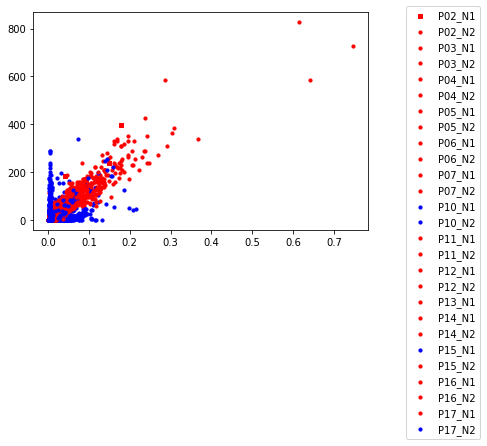

In [186]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(frames[0]['Apple Watch ENMO'], frames[0]['Actiwatch activity counts'], s=10, color="r", marker="s", label='P02_N1')
ax1.scatter(frames[1]['Apple Watch ENMO'], frames[1]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P02_N2')
ax1.scatter(frames[2]['Apple Watch ENMO'], frames[2]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P03_N1')
ax1.scatter(frames[3]['Apple Watch ENMO'], frames[3]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P03_N2')
ax1.scatter(frames[4]['Apple Watch ENMO'], frames[4]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P04_N1')
ax1.scatter(frames[5]['Apple Watch ENMO'], frames[5]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P04_N2')
ax1.scatter(frames[6]['Apple Watch ENMO'], frames[6]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P05_N1')
ax1.scatter(frames[7]['Apple Watch ENMO'], frames[7]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P05_N2')
ax1.scatter(frames[8]['Apple Watch ENMO'], frames[8]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P06_N1')
ax1.scatter(frames[9]['Apple Watch ENMO'], frames[9]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P06_N2')
ax1.scatter(frames[10]['Apple Watch ENMO'], frames[10]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P07_N1')
ax1.scatter(frames[11]['Apple Watch ENMO'], frames[11]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P07_N2')
ax1.scatter(frames[12]['Apple Watch ENMO'], frames[12]['Actiwatch activity counts'], s=10, color="b", marker="o", label='P10_N1')#whack
ax1.scatter(frames[13]['Apple Watch ENMO'], frames[13]['Actiwatch activity counts'], s=10, color="b", marker="o", label='P10_N2')#whack
ax1.scatter(frames[14]['Apple Watch ENMO'], frames[14]['Actiwatch activity counts'], s=10, color="r" , marker="o", label='P11_N1')
ax1.scatter(frames[15]['Apple Watch ENMO'], frames[15]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P11_N2')
ax1.scatter(frames[16]['Apple Watch ENMO'], frames[16]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P12_N1')
ax1.scatter(frames[17]['Apple Watch ENMO'], frames[17]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P12_N2')
ax1.scatter(frames[18]['Apple Watch ENMO'], frames[18]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P13_N1')
ax1.scatter(frames[19]['Apple Watch ENMO'], frames[19]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P14_N1')
ax1.scatter(frames[20]['Apple Watch ENMO'], frames[20]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P14_N2')
ax1.scatter(frames[21]['Apple Watch ENMO'], frames[21]['Actiwatch activity counts'], s=10, color="b",  marker="o", label='P15_N1')#whack
ax1.scatter(frames[22]['Apple Watch ENMO'], frames[22]['Actiwatch activity counts'], s=10,  color="r",marker="o", label='P15_N2')
ax1.scatter(frames[23]['Apple Watch ENMO'], frames[23]['Actiwatch activity counts'], s=10,  color="r",marker="o", label='P16_N1')
ax1.scatter(frames[24]['Apple Watch ENMO'], frames[24]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P16_N2')
ax1.scatter(frames[25]['Apple Watch ENMO'], frames[25]['Actiwatch activity counts'], s=10, color="r", marker="o", label='P17_N1')
ax1.scatter(frames[26]['Apple Watch ENMO'], frames[26]['Actiwatch activity counts'], s=10,  color="b",marker="o", label='P17_N2')#whack
plt.legend(bbox_to_anchor=(1.1, 1.05))
#plt.ylim(0,400)
#plt.xlim(0,.3)
plt.show()


In [20]:
len(frames)

27

In [141]:
applewatch = []
index = 1
for frame in frames:
    df1 = frame[frame['Actiwatch activity counts'] == 0 ]
    applewatch.append(df1['Apple Watch ENMO'])
    print("Range of " + str(frame['fileName'].iloc[0]) + " Min: "+str(frame['Apple Watch ENMO'].min()) + " Max: "+str(frame['Apple Watch ENMO'].max()) + " Index: " + str(index))
    index += 1

Range of P02_N1 Min: 0.001227292 Max: 0.17943584 Index: 1
Range of P02_N2 Min: 0.001061583 Max: 0.241735475 Index: 2
Range of P03_N1 Min: 0.000835602 Max: 0.7457027270000001 Index: 3
Range of P03_N2 Min: 0.000989703 Max: 0.6416522570000001 Index: 4
Range of P04_N1 Min: 0.0006746489999999999 Max: 0.143014203 Index: 5
Range of P04_N2 Min: 0.000899615 Max: 0.164433802 Index: 6
Range of P05_N1 Min: 0.000932262 Max: 0.05646109 Index: 7
Range of P05_N2 Min: 0.000858173 Max: 0.060159927 Index: 8
Range of P06_N1 Min: 0.000920264 Max: 0.13821735400000001 Index: 9
Range of P06_N2 Min: 0.000505172 Max: 0.109633149 Index: 10
Range of P07_N1 Min: 0.0011033360000000001 Max: 0.19765574100000002 Index: 11
Range of P07_N2 Min: 0.00097339 Max: 0.17918277 Index: 12
Range of P10_N1 Min: 0.0009808039999999998 Max: 0.20766250600000002 Index: 13
Range of P10_N2 Min: 0.001258831 Max: 0.186831036 Index: 14
Range of P11_N1 Min: 0.000984059 Max: 0.195136244 Index: 15
Range of P11_N2 Min: 0.000964415 Max: 0.22259

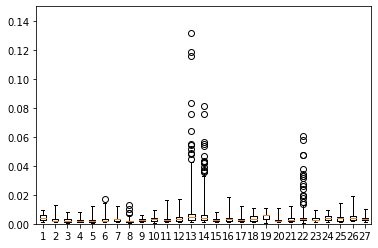

In [156]:
plt.boxplot(applewatch, whis=10)
#plt.ylim(0,.005)
plt.ylim(0,.15)
plt.show()

#good evidence for removeing 13, 14 and 22

In [171]:
actiwatch = []
index = 1
for frame in frames:
    df1 = frame[frame['Apple Watch ENMO'] < 0.02]
    actiwatch.append(df1['Actiwatch activity counts'])
    print("Range of " + str(frame['fileName'].iloc[0]) + " Min: "+str(frame['Actiwatch activity counts'].min()) + " Max: "+str(frame['Actiwatch activity counts'].max()) + " Index: " + str(index))
    index += 1

Range of P02_N1 Min: 0.0 Max: 398.0 Index: 1
Range of P02_N2 Min: 0.0 Max: 253.0 Index: 2
Range of P03_N1 Min: 0.0 Max: 729.0 Index: 3
Range of P03_N2 Min: 0.0 Max: 584.0 Index: 4
Range of P04_N1 Min: 0 Max: 188 Index: 5
Range of P04_N2 Min: 0 Max: 318 Index: 6
Range of P05_N1 Min: 0.0 Max: 91.0 Index: 7
Range of P05_N2 Min: 0.0 Max: 85.0 Index: 8
Range of P06_N1 Min: 0.0 Max: 201.0 Index: 9
Range of P06_N2 Min: 0.0 Max: 134.0 Index: 10
Range of P07_N1 Min: 0.0 Max: 208.0 Index: 11
Range of P07_N2 Min: 0.0 Max: 229.0 Index: 12
Range of P10_N1 Min: 0.0 Max: 339.0 Index: 13
Range of P10_N2 Min: 0.0 Max: 201.0 Index: 14
Range of P11_N1 Min: 0.0 Max: 270.0 Index: 15
Range of P11_N2 Min: 0.0 Max: 215.0 Index: 16
Range of P12_N1 Min: 0.0 Max: 237.0 Index: 17
Range of P12_N2 Min: 0.0 Max: 328.0 Index: 18
Range of P13_N1 Min: 0.0 Max: 827.0 Index: 19
Range of P14_N1 Min: 0.0 Max: 361.0 Index: 20
Range of P14_N2 Min: 0.0 Max: 237.0 Index: 21
Range of P15_N1 Min: 0.0 Max: 245.0 Index: 22
Range o

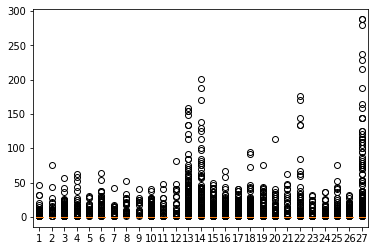

In [176]:
plt.boxplot(actiwatch, whis=1000)
#plt.ylim(0,.005)
#plt.ylim(-1,100)
plt.show()

#remove 13, 14, 22, 27

In [35]:
final_df['Apple Watch ENMO'].isnull().sum()

2

In [36]:
final_df[final_df['Actiwatch activity counts'].isnull()]

,timestamp,Actiwatch activity counts,Actiware classification,Apple Watch ENMO,fileName
8,07/01/2000 23:26:00,NaN,NaN,NaN,P05_N2
5,09/01/2000 20:45:15,NaN,NaN,NaN,P06_N2


In [193]:
#add new dataset with removed nights
filter_final_df = final_df[(final_df['fileName'] != 'P10_N1')&(final_df['fileName'] != 'P10_N2')&(final_df['fileName'] != 'P17_N2')&(final_df['fileName'] != 'P15_N1')]

In [196]:
filter_final_df.to_csv('derived_data/combined_dataset_2_filter.csv')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4fd78f3908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4fd76dfd30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4fd78f33c8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4fe0031278>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4fe0031ba8>],
 'means': []}

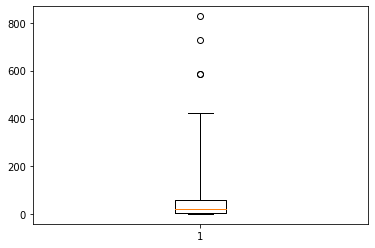

In [212]:
filter_final_df_drops = filter_final_df.dropna()
filter_final_df_drops = filter_final_df_drops[filter_final_df_drops['Actiwatch activity counts'] != 0 ]
plt.boxplot(filter_final_df_drops['Actiwatch activity counts'], whis = 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4fe0398908>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4fe0398b38>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4fe0398cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4fe043c668>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4fe043c6d8>],
 'means': []}

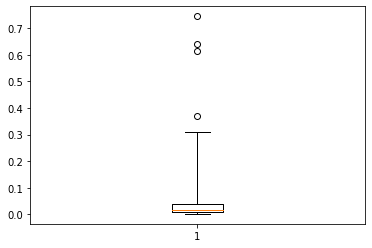

In [213]:
filter_final_df_drops = filter_final_df.dropna()
filter_final_df_drops = filter_final_df_drops[filter_final_df_drops['Actiwatch activity counts'] != 0 ]
plt.boxplot(filter_final_df_drops['Apple Watch ENMO'])